<a href="https://colab.research.google.com/github/adnansamisk/House-Rent-Prediction-INDIA/blob/main/HOUSE%20PREDICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Rent Prediction

Description:- House price prediction is a common problem in the real estate industry and
involves predicting the selling price of a house based on various features and attributes. The
problem is typically approached as a regression problem, where the target variable is the
price of the house, and the features are various attributes of the house
The features used in house price prediction can include both quantitative and categorical
variables, such as the number of bedrooms, house area, bedrooms, furnished, nearness to
main road, and various amenities such as a garage and other factors that may influence the
value of the property.
Accurate predictions can help agents and appraisers price homes correctly, while
homeowners can use the predictions to set a reasonable asking price for their properties.
Accurate house price prediction can also be useful for buyers who are looking to make
informed decisions about purchasing a property and obtaining a fair price for their
investment.

# Attribute Information:

Name - Description

1- Price-Prices of the houses

2- Area- Area of the houses

3- Bedrooms- No of house bedrooms

4- Bathrooms- No of bathrooms

5- Stories- No of house stories

6- Main Road- Weather connected to Main road

7- Guestroom-Weather has a guest room

8- Basement-Weather has a basement

9- Hot water heating- Weather has a hot water heater

10-Airconditioning-Weather has a air conditioner

11-Parking- No of house parking

12-Furnishing Status-Furnishing status of house


# Importing Packages

In [3]:
import plotly.express as px
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Removes the limit from the number of displayed columns and rows. 
# This is so I can see the entire dataframe when I print it 
pd.set_option("display.max_columns", None)

#pd.set_option('display.max_rows', None) 
pd.set_option("display.max_rows", 200)

#To build Linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import (
    RandomForestRegressor, 
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor,
)
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

import warnings

warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

#Loading And Exploring The Data

In [5]:
# Load the CSV file into a pandas DataFrame
# -*- coding: utf-8 -*-
df = pd.read_csv('/content/drive/MyDrive/Housing.csv')

# View the first few rows of the DataFrame
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking furnishingstatus  
0              no             yes        2        furnished  
1              no             yes        3        furnished  
2              no              no        2   semi-furnished  
3              no             yes        3        furnished  
4              no             yes        2        furnished  


# Data Visualization

In [ ]:
df["mainroad"] = df["mainroad"].replace(["yes", "no"], [1, 0])
df["guestroom"] = df["guestroom"].replace(["yes", "no"], [1, 0])
df["basement"] = df["basement"].replace(["yes", "no"], [1, 0])
df["hotwaterheating"] = df["hotwaterheating"].replace(["yes", "no"], [1, 0])
df["airconditioning"] = df["airconditioning"].replace(["yes", "no"], [1, 0])
df["guestroom"] = df["guestroom"].replace(["yes", "no"], [1, 0])

## Univariate Analysis

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking furnishingstatus  
0              no             yes        2        furnished  
1              no             yes        3        furnished  
2              no              no        2   semi-furnished  
3              no             yes        3        furnished  
4              no             yes        2        furnished  
count    5.450000e+02
mean     4.766729e+06
std      1.870440e+06
min      1.750000e+06
25%      3.430000e+06
50%      4.340000e+06
75%      5.740000e+06

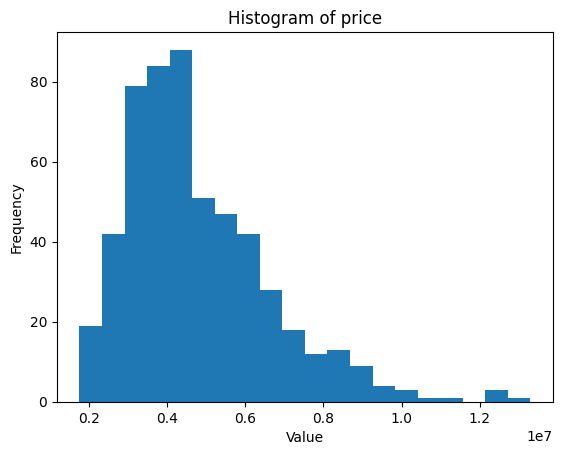

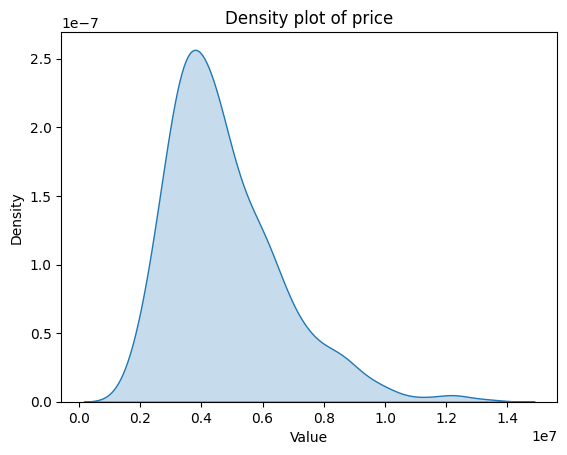

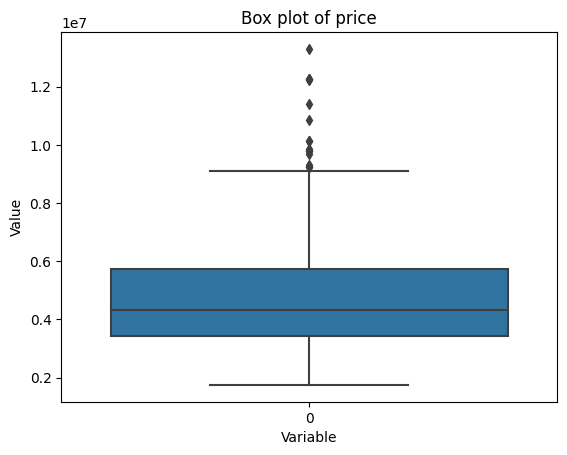

In [ ]:
# Select a numerical variable for analysis
num_var1 = 'price'
num_var2 = 'area'
num_var3 = 'bedrooms'# Descriptive statistics
print(df[num_var1].describe())

# Histogram
plt.hist(df[num_var1], bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of ' + num_var1)
plt.show()

# Density plot
sns.kdeplot(df[num_var1], shade=True)
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Density plot of ' + num_var1)
plt.show()

# Box plot
sns.boxplot(df[num_var1])
plt.xlabel('Variable')
plt.ylabel('Value')
plt.title('Box plot of ' + num_var1)
plt.show()

## Bi-Variate Analysis

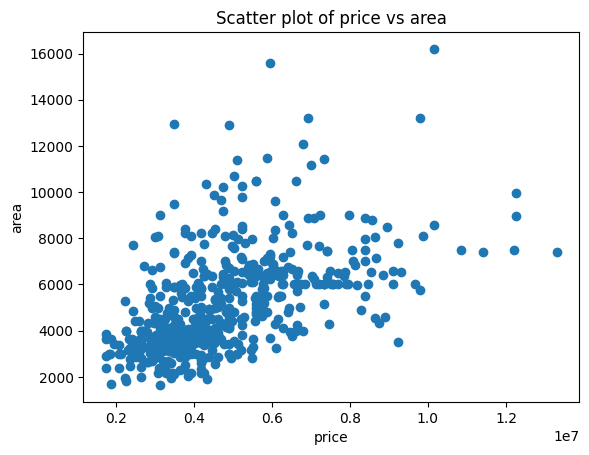

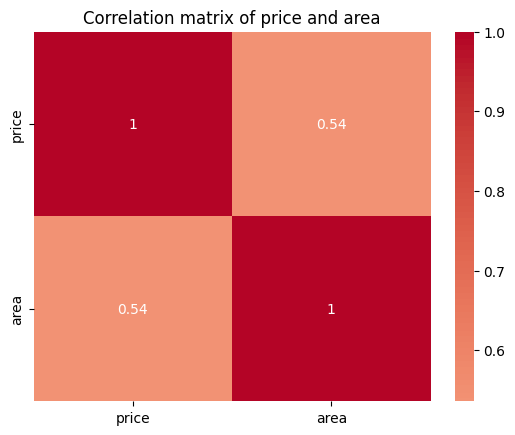

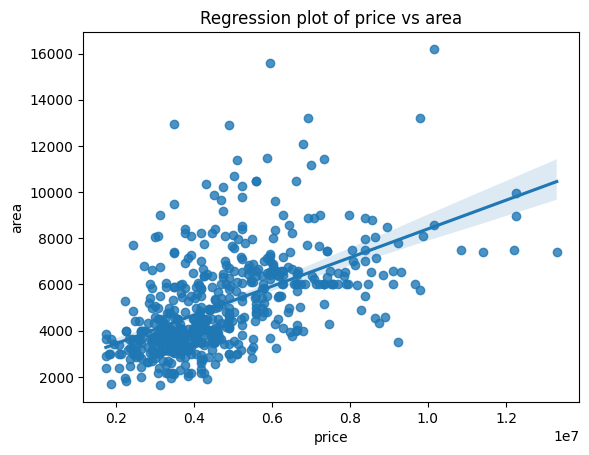

In [ ]:
# Scatter plot
plt.scatter(df[num_var1], df[num_var2])
plt.xlabel(num_var1)
plt.ylabel(num_var2)
plt.title('Scatter plot of ' + num_var1 + ' vs ' + num_var2)
plt.show()

# Correlation matrix
corr = df[[num_var1, num_var2]].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, center=0)
plt.title('Correlation matrix of ' + num_var1 + ' and ' + num_var2)
plt.show()

# Regression plot
sns.regplot(x=num_var1, y=num_var2, data=df)
plt.xlabel(num_var1)
plt.ylabel(num_var2)
plt.title('Regression plot of ' + num_var1 + ' vs ' + num_var2)
plt.show()


## Multi-Variate Analysis

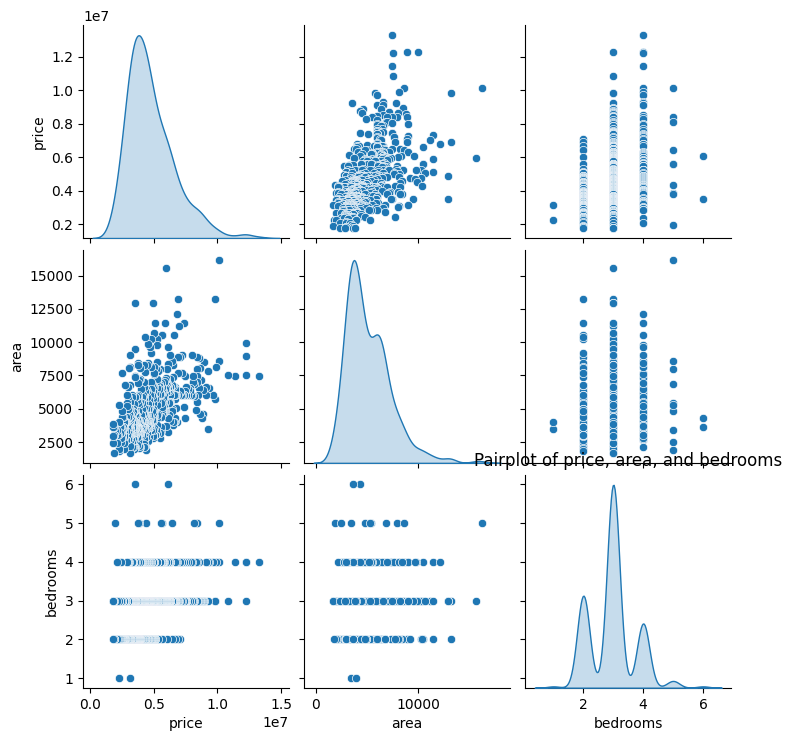

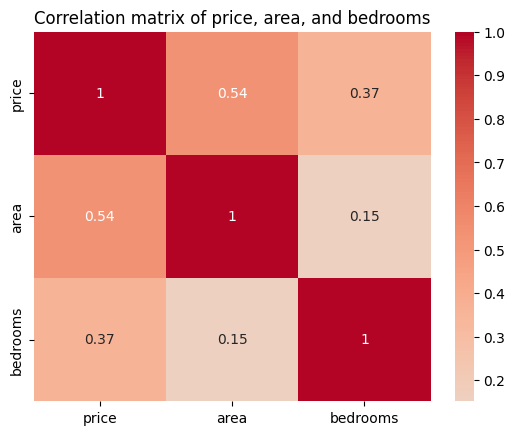

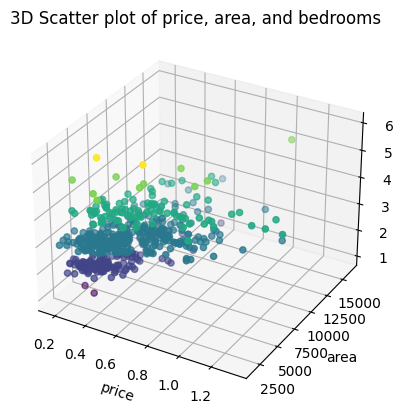

In [ ]:
# Pairplot
sns.pairplot(df[[num_var1, num_var2, num_var3]], diag_kind='kde')
plt.title('Pairplot of ' + num_var1 + ', ' + num_var2 + ', and ' + num_var3)
plt.show()

# Heatmap
corr = df[[num_var1, num_var2, num_var3]].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, center=0)
plt.title('Correlation matrix of ' + num_var1 + ', ' + num_var2 + ', and ' + num_var3)
plt.show()

# 3D Scatter plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(df[num_var1], df[num_var2], df[num_var3], c=df[num_var3])
ax.set_xlabel(num_var1)
ax.set_ylabel(num_var2)
ax.set_zlabel(num_var3)
plt.title('3D Scatter plot of ' + num_var1 + ', ' + num_var2 + ', and ' + num_var3)
plt.show()

# Descriptive statistics

In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'furnishingstatus'],
      dtype='object')

# Checking for Missing Values

In [ ]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

# Outliers

In [ ]:
def remove_outlier (col):
    sorted(col)
    q1, q3= np.quantile (col, [0.25, 0.75])
    iqr =  q3 - q1
    ll = q1 - 1.5 * iqr
    ul = q3 + 1.5* iqr
    return ll, ul

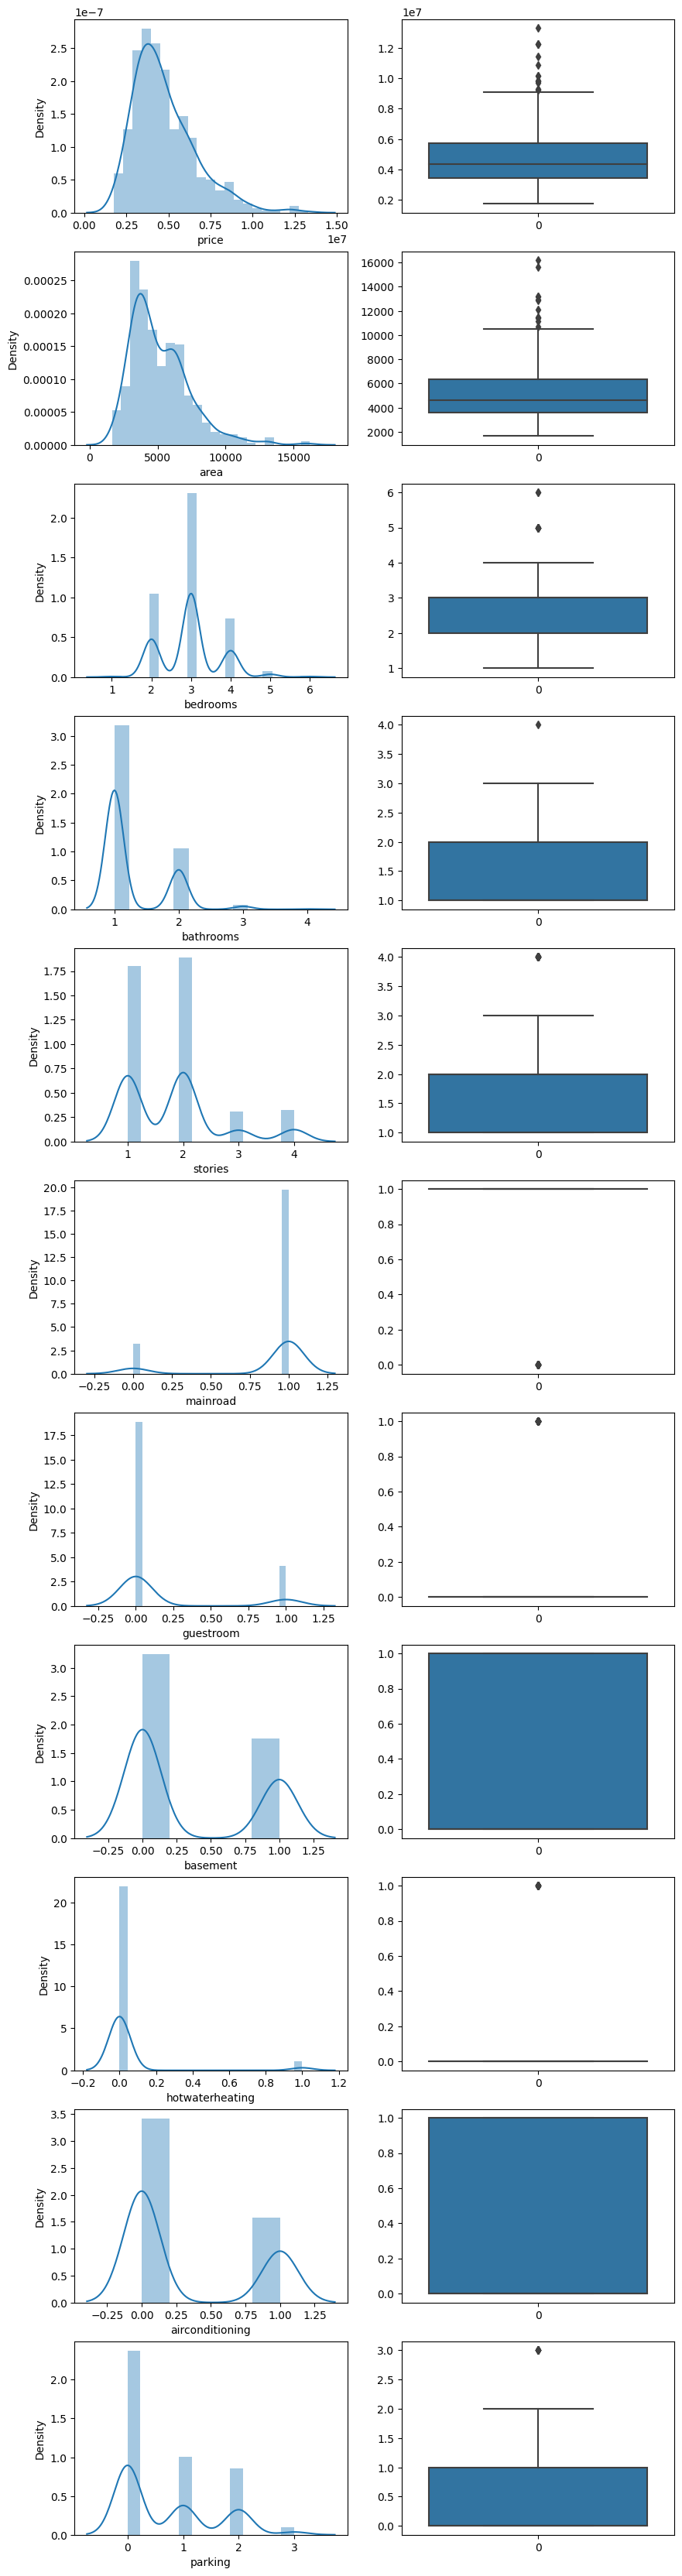

In [ ]:
a = 1
plt.figure(figsize=(10, 50))
for i in df[    
      [
            'price',
            'area',
            'bedrooms',
            'bathrooms',
            'stories',
            'mainroad',
            'guestroom',
            'basement',
            'hotwaterheating',
            'airconditioning',
            'parking',
            'furnishingstatus'
      ]
]:
      if df[i].dtype != "object":
          plt.subplot(13, 2, a) 
          sns.distplot(df[i])
          # plt.title("Histogram for:" + i) 
          plt.subplot(13, 2, a + 1) 
          sns.boxplot(df[i])
          # plt.title("Boxplot for:" + i)
          a += 2

# Dependable and Independent variables

In [ ]:
X1 = df.drop(["price"], axis=1) 
y1=df[["price"]]

X1.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,furnished
1,8960,4,4,4,1,0,0,0,1,3,furnished
2,9960,3,2,2,1,0,1,0,0,2,semi-furnished
3,7500,4,2,2,1,0,1,0,1,3,furnished
4,7420,4,1,2,1,1,1,0,1,2,furnished


In [ ]:
y1.head()

,price
0,13300000
1,12250000
2,12250000
3,12215000
4,11410000


In [ ]:
X1 = pd.get_dummies(X1, columns=["furnishingstatus"], drop_first=True) 
X1.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,7420,4,2,3,1,0,0,0,1,2,0,0
1,8960,4,4,4,1,0,0,0,1,3,0,0
2,9960,3,2,2,1,0,1,0,0,2,1,0
3,7500,4,2,2,1,0,1,0,1,3,0,0
4,7420,4,1,2,1,1,1,0,1,2,0,0


# Splitting the data into dependent and independent variables.

In [ ]:
# split the first dataset for price prediction into train and test
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(
     X1, y1, test_size=0.3, random_state=42
)

# Building model and Training 


In [ ]:
linearregression1 = LinearRegression() 
linearregression1.fit(X1_train, y1_train)

LinearRegression()

In [ ]:
for idx, col_name in enumerate(X1_train.columns):
    print(
          "The coefficient for {} is {}".format(col_name, linearregression1.coef_[0][idx])
    )

The coefficient for area is 266.92012608744704
The coefficient for bedrooms is 91225.71343363449
The coefficient for bathrooms is 1084070.6519339457
The coefficient for stories is 419751.81829968933
The coefficient for mainroad is 506691.8415099083
The coefficient for guestroom is 317901.38058316836
The coefficient for basement is 571835.0981437935
The coefficient for hotwaterheating is 576753.0752835027
The coefficient for airconditioning is 682435.7551954738
The coefficient for parking is 313200.2481594188
The coefficient for furnishingstatus_semi-furnished is -126151.87392300418
The coefficient for furnishingstatus_unfurnished is -402413.8055692089


In [ ]:
print("The intercept for our model is {}".format(linearregression1.intercept_[0]))

The intercept for our model is 26595.312565470114


In [ ]:
pred_train1 = linearregression1.predict(X1_train)
pred_test1 = linearregression1.predict(X1_test)

In [ ]:
# R2 Squared:

print("R2 Squared for X1:")

lrscore_train1 = linearregression1.score (X1_train, y1_train) 
lrscore_test1 = linearregression1.score (X1_test, y1_test) 
print(lrscore_train1)
print(lrscore_test1)

R2 Squared for X1:
0.6803175135676948
0.6186560032411081


In [ ]:
# RMSE

print("\nRMSE for X1:")

rmse_lr_train1 = mean_squared_error(y1_train, pred_train1, squared=False) 
rmse_lr_test1 = mean_squared_error(y1_test, pred_test1, squared=False) 
print(rmse_lr_train1)
print(rmse_lr_test1)


RMSE for X1:
1002149.363929761
1281489.9283207087


In [ ]:
data1 = y1_test.copy()
data1["pred1"] = pred_test1
data1["residual1"] = data1["price"] - data1["pred1"]
data1.head()

,price,pred1,residual1
316,4060000,5.456593e+06,-1.396593e+06
77,6650000,6.651778e+06,-1.777628e+03
360,3710000,3.171766e+06,5.382335e+05
90,6440000,4.621423e+06,1.818577e+06
493,2800000,3.367790e+06,-5.677905e+05


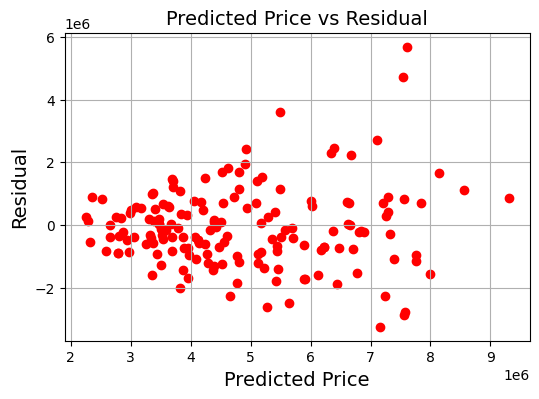

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter (data1["pred1"], data1["residual1"], color="red") 
plt.title("Predicted Price vs Residual", fontsize=14) 
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

<Axes: xlabel='residual1', ylabel='Density'>

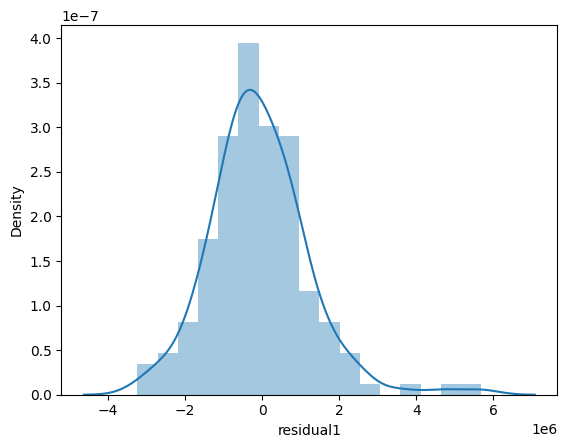

In [ ]:
sns.distplot(data1.residual1)

# Another Model for Reference

In [ ]:
rfregressor1 = RandomForestRegressor(max_depth=10, min_samples_split=50, criterion="friedman_mse") 
rfregressor1.fit(X1_train, y1_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=50)

In [ ]:
pred_train1 = rfregressor1.predict(X1_train)
pred_test1 = rfregressor1.predict(X1_test)

In [ ]:
print("\nRF Score for X1:")

rfscore_train1 = rfregressor1.score(X1_train, y1_train)
rfscore_test1 = rfregressor1.score(X1_test, y1_test)
print(rfscore_train1)
print(rfscore_test1)


RF Score for X1:
0.6293393655493804
0.48149322492003266


In [ ]:
print("\nRMSE Score for X1:")
rmse_rf_train1 = mean_squared_error(y1_train, pred_train1, squared=False) 
rmse_rf_test1 = mean_squared_error(y1_test, pred_test1, squared=False)
print(rmse_rf_train1)
print(rmse_rf_test1)


RMSE Score for X1:
1079098.9385250497
1494286.792942154


In [ ]:
data1 = y1_test.copy()
data1["pred1"] = pred_test1
data1["residual1"] = data1["price"] - data1["pred1"]
data1.head()

,price,pred1,residual1
316,4060000,5.090528e+06,-1.030528e+06
77,6650000,7.148359e+06,-4.983594e+05
360,3710000,4.008325e+06,-2.983251e+05
90,6440000,4.609940e+06,1.830060e+06
493,2800000,4.097405e+06,-1.297405e+06


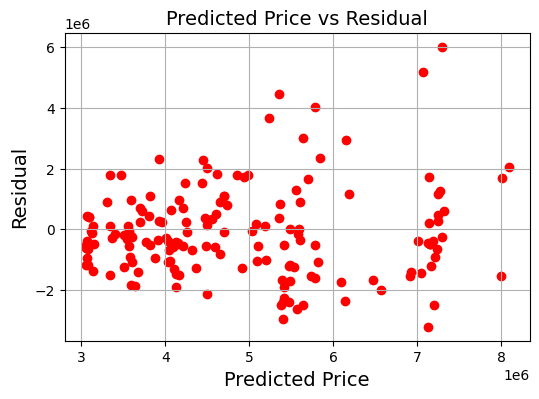

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter (data1["pred1"], data1["residual1"], color="red") 
plt.title("Predicted Price vs Residual", fontsize=14) 
plt.xlabel("Predicted Price", fontsize=14)
plt.ylabel("Residual", fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
pd.DataFrame(rfregressor1.feature_importances_, index=X1_test.columns).sort_values(
        0, ascending=False
)

,0
area,0.632356
bathrooms,0.197008
furnishingstatus_unfurnished,0.051948
airconditioning,0.034541
stories,0.024295
bedrooms,0.022730
basement,0.013828
parking,0.012077
hotwaterheating,0.007534
guestroom,0.001863
